In [1]:
# Import modules
import numpy as np
import seaborn as sns
import pandas as pd

# Import PySwarms
import pyswarms as ps

In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=15, n_classes=3,
                           n_informative=4, n_redundant=1, n_repeated=2,
                           random_state=1)

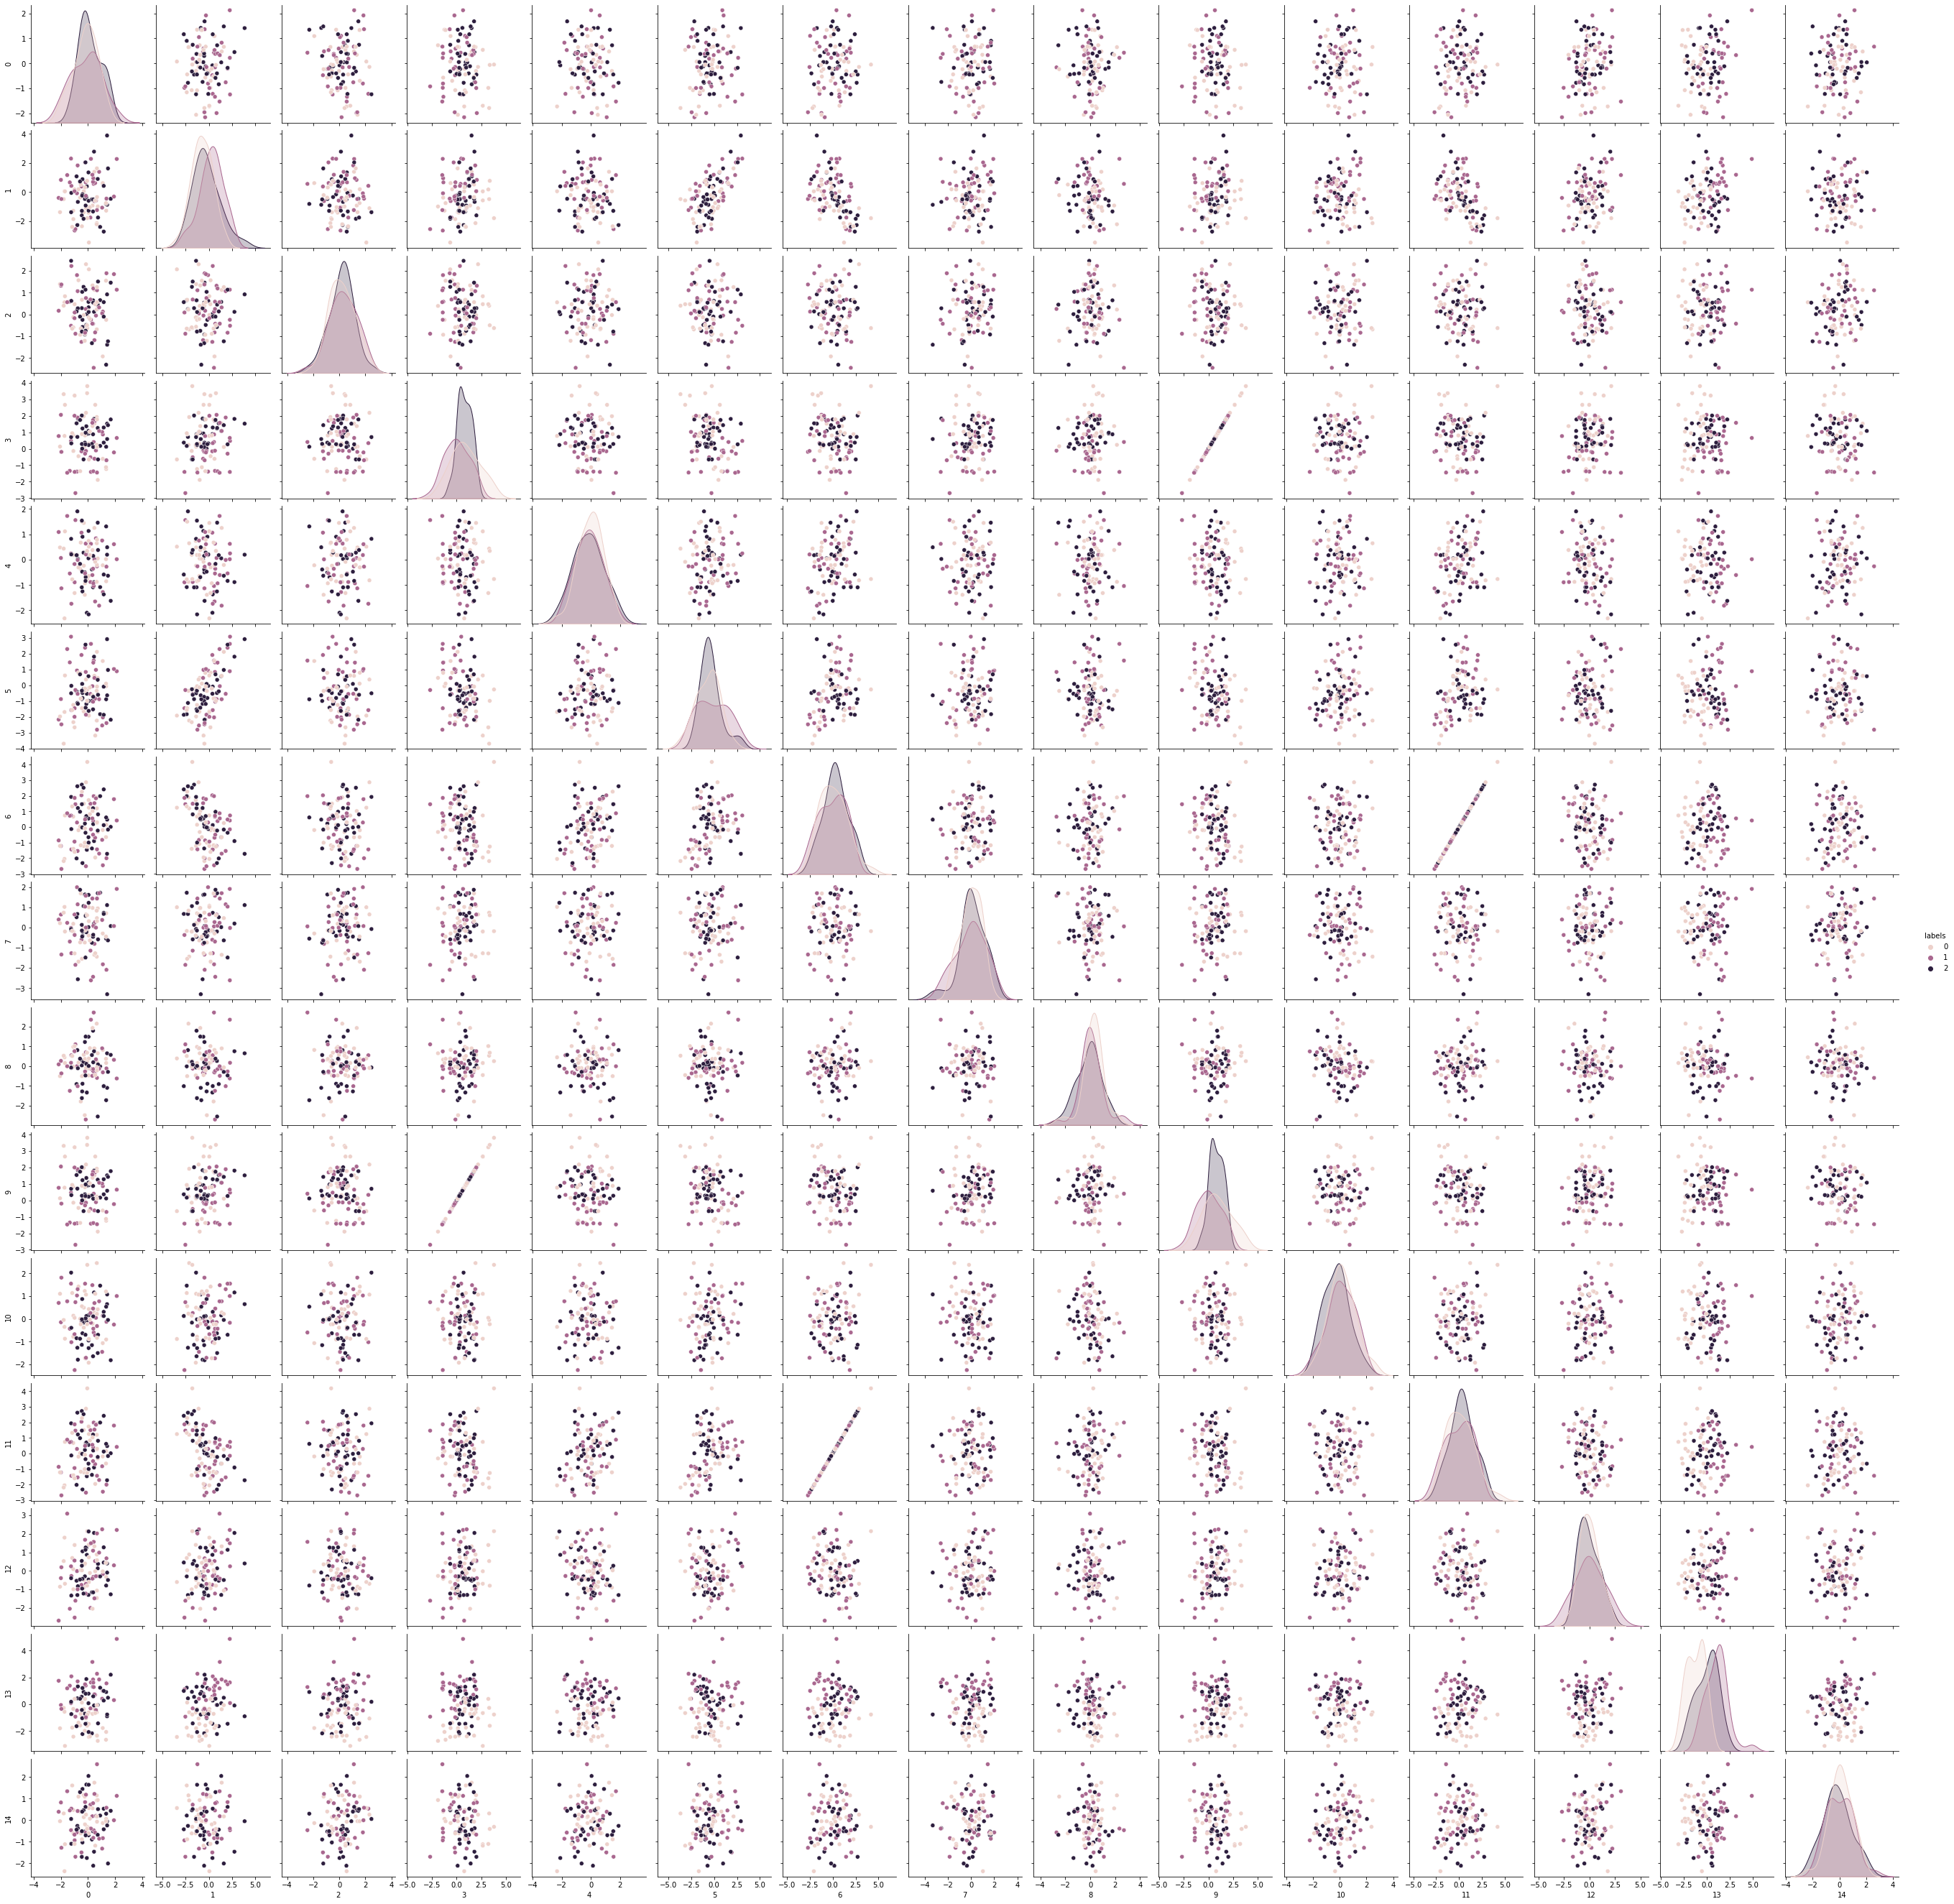

In [3]:
# Plot toy dataset per feature
df = pd.DataFrame(X)
df['labels'] = pd.Series(y)

sns.pairplot(df, hue='labels');

In [4]:
from sklearn import linear_model

# Create an instance of the classifier
classifier = linear_model.LogisticRegression()

# Define objective function
def f_per_particle(m, alpha):
    """Computes for the objective function per particle

    Inputs
    ------
    m : numpy.ndarray
        Binary mask that can be obtained from BinaryPSO, will
        be used to mask features.
    alpha: float (default is 0.5)
        Constant weight for trading-off classifier performance
        and number of features

    Returns
    -------
    numpy.ndarray
        Computed objective function
    """
    total_features = 15
    # Get the subset of the features from the binary mask
    if np.count_nonzero(m) == 0:
        X_subset = X
    else:
        X_subset = X[:,m==1]
    # Perform classification and store performance in P
    classifier.fit(X_subset, y)
    P = (classifier.predict(X_subset) == y).mean()
    # Compute for the objective function
    j = (alpha * (1.0 - P)
        + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))

    return j

In [13]:
def f(x, alpha=0.88, print_step = 100):
    """Higher-level method to do classification in the
    whole swarm.

    Inputs
    ------
    x: numpy.ndarray of shape (n_particles, dimensions)
        The swarm that will perform the search

    Returns
    -------
    numpy.ndarray of shape (n_particles, )
        The computed loss for each particle
    """
    n_particles = x.shape[0]
    j = [f_per_particle(x[i], alpha) for i in range(n_particles)]
    return np.array(j)

In [14]:
# Initialize swarm, arbitrary
options = {'c1': 0.5, 'c2': 0.5, 'w':0.9, 'k': 30, 'p':2}

# Call instance of PSO
dimensions = 15 # dimensions should be the number of features
optimizer = ps.discrete.BinaryPSO(n_particles=30, dimensions=dimensions, options=options)
# optimizer.reset()

# Perform optimization
cost, pos = optimizer.optimize(f, print_step=100, iters=1000, verbose=2)

2020-11-23 21:13:07,997 - pyswarms.discrete.binary - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|1000/1000, best_cost=0.193
2020-11-23 21:16:33,151 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.19279999999999997, best pos: [1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]


In [16]:
# Create two instances of LogisticRegression
classfier = linear_model.LogisticRegression()

# Get the selected features from the final positions
X_selected_features = X[:,pos==1]  # subset

# Perform classification and store performance in P
c1 = classifier.fit(X_selected_features, y)

# Compute performance
subset_performance = (c1.predict(X_selected_features) == y).mean()


print('Subset performance: %.3f' % (subset_performance))

Subset performance: 0.790


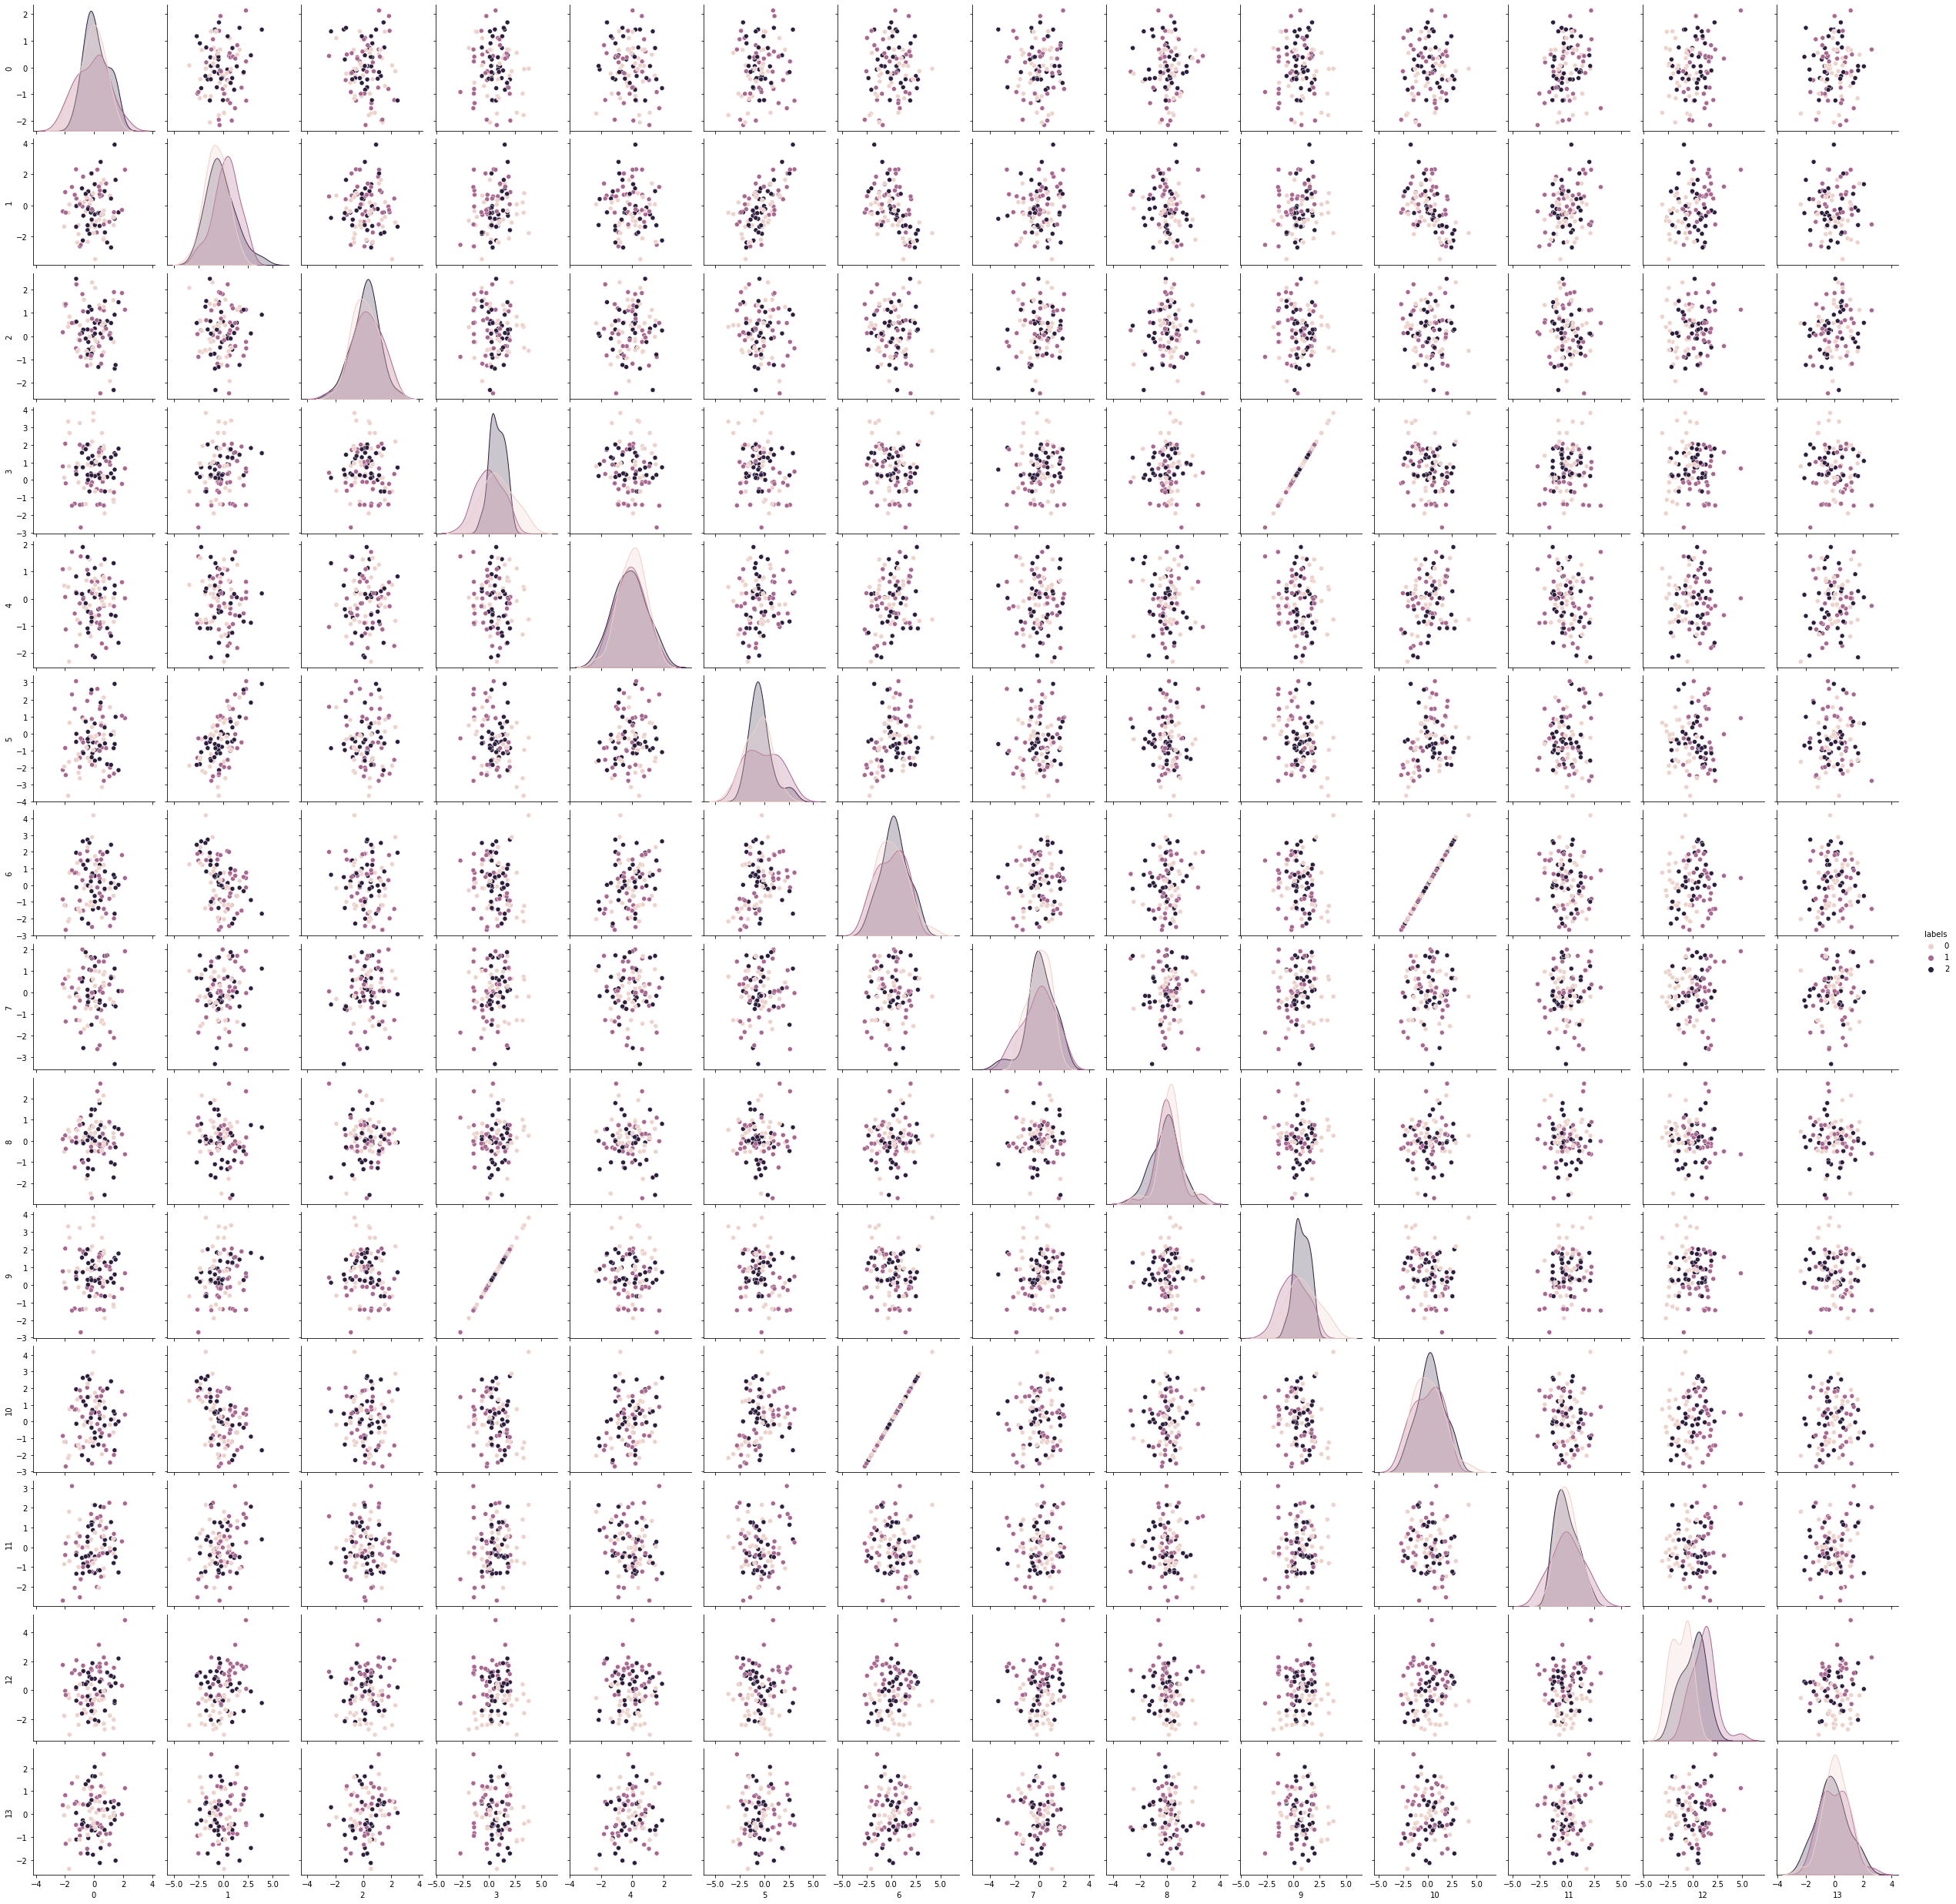

In [17]:
# Plot toy dataset per feature
df1 = pd.DataFrame(X_selected_features)
df1['labels'] = pd.Series(y)

sns.pairplot(df1, hue='labels')